In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import gym
import gym_inventory
from tqdm import tqdm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False)

# Agent 생성

In [2]:
class Agent :
    '''에이전트'''
    
    def __init__(self, num_states, num_actions) :
        self.brain = Brain(num_states, num_actions) # 에이전트의 행동을 결정하는 두뇌 
        
    def update_Q_function(self, observation, action, reward, observation_next)  :
        '''Q함수 수정'''
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step) :
        '''행동 결정'''
        action = self.brain.decide_action(observation, step)
        return action

In [3]:
class Brain :
    '''에이전트의 두뇌 역할을 하는 클래스, Q-learning을 실제로 수행'''
    
    def __init__(self, num_states, num_actions) :
        self.num_actions = num_actions # 행동의 가짓수를 구함
        
        # Q-table 생성
        self.q_table = np.zeros((num_states, num_actions))
#         self.q_table = np.random.uniform(low=0, high=1, size=(num_states, num_actions))
        print(self.q_table.shape)
        
    def update_Q_table(self, observation, action, reward, observation_next) :
        '''Q-learning으로 Q-table을 수정'''
        state = observation - 1
        state_next = observation_next - 1
        Max_Q_next = max(self.q_table[state_next][:])
        
        self.q_table[state, action] = self.q_table[state, action] + \
        ETA*(reward + GAMMA*Max_Q_next - self.q_table[state, action])
        
    def decide_action(self, observation, episode) :
        '''e-greedy 알고리즘을 적용해 서서히 최적행동의 비중을 늘림'''
        state = observation - 1
        epsilon = 0.5 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1) :
            action = np.argmax(self.q_table[state][:])
        else :
            action = np.random.choice(self.num_actions)
            
        return action

# Environment 생성

In [4]:
class Environment :
    '''Inventory Env를 실행하는 환경 역할을 하는 클래스'''
    
    def __init__(self) :
        self.env = gym.make(ENV) # 실행할 태스크를 설정
        num_states = self.env.observation_space.n
        num_actions = self.env.action_space.n
        self.agent = Agent(num_states, num_actions) # 에이전트 객체를 생성
        
    def run(self) :
        '''실행'''
        rewards_list = []
        for episode in tqdm(range(NUM_EPISODES)) : # 에피소드만큼 반복
            observation = self.env.reset() # 환경 초기화
            
            for step in range(MAX_STEPS) : # 1 에피소드에 해당하는 반복
                                
                # 행동을 선택
                action = self.agent.get_action(observation, episode)
                
                # 행동 a_t를 실행해 s_{t+1}, r_{t+1}을 계산
                observation_next, reward, done, _ = self.env.step(action) # reward, info는 사용하지 않으므로 _ 처리
                
#                 print(reward)
                
                # 다음 단계의 상태 observation_next로 Q함수를 수정
                self.agent.update_Q_function(observation, action, reward, observation_next)
                
                # 다음 단계 상태 관측
                observation = observation_next
                
                # 에피소드 마무리
                if done :
                    print('{0} Episode: Finished after {1} time steps'.format(episode, step + 1))
                    break
            rewards_list.append(reward) 

#             print('-'*20)

        return [num for num in range(NUM_EPISODES * MAX_STEPS)],rewards_list
    

# 학습

In [5]:
ENV = 'Inventory-v0'
inventory = Environment()

(100, 100)


In [6]:
GAMMA = 0.99 # 시간할인율
ETA = 0.3 # 학습률
MAX_STEPS = 30 # 1에피소드당 최대 단계 수
NUM_EPISODES = 100000 # 최대 에피소드 수

In [7]:
idx, rewards_list = inventory.run()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [01:57<00:00, 849.15it/s]


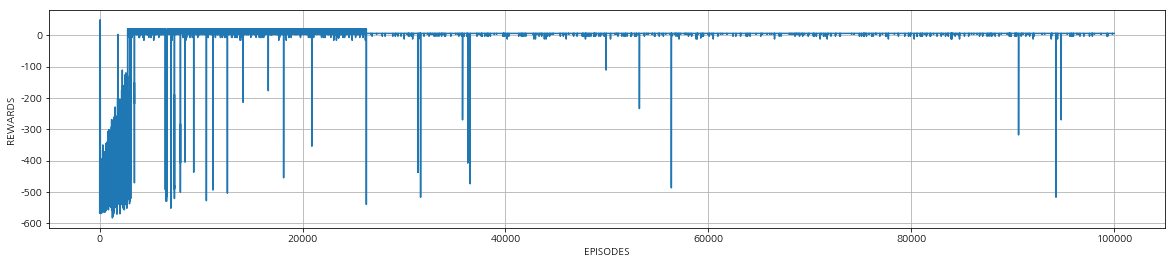

In [8]:
plt.rcParams["figure.figsize"] = (20,4)

fig, ax = plt.subplots()
ax.plot([num for num in range(NUM_EPISODES)], rewards_list)
ax.set_xlabel('EPISODES')
ax.set_ylabel('REWARDS')
ax.grid(True)

plt.show()

In [9]:
policy_list = []
inventory_status_list = []

for i, each in enumerate(inventory.agent.brain.q_table) :
    q_order = np.argmax(each)
    real_order = max(min(i + q_order, 100) -i  , 0)
    new_inventory = i + real_order
    
    policy_list.append(real_order)
    inventory_status_list.append(new_inventory)
    
    print('[재고가 {:2}개 있을 경우]'.format(i))
    print('Q-table 상의 action : {:2}개 주문'.format(q_order))
    print('실제 주문량과 주문 후 재고 : {:2}개 주문하여 {:2}개의 재고 확보'.format(real_order, new_inventory))
    print()

[재고가  0개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여  0개의 재고 확보

[재고가  1개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여  1개의 재고 확보

[재고가  2개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여  2개의 재고 확보

[재고가  3개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여  3개의 재고 확보

[재고가  4개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여  4개의 재고 확보

[재고가  5개 있을 경우]
Q-table 상의 action :  7개 주문
실제 주문량과 주문 후 재고 :  7개 주문하여 12개의 재고 확보

[재고가  6개 있을 경우]
Q-table 상의 action :  1개 주문
실제 주문량과 주문 후 재고 :  1개 주문하여  7개의 재고 확보

[재고가  7개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여  7개의 재고 확보

[재고가  8개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여  8개의 재고 확보

[재고가  9개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여  9개의 재고 확보

[재고가 10개 있을 경우]
Q-table 상의 action :  1개 주문
실제 주문량과 주문 후 재고 :  1개 주문하여 11개의 재고 확보

[재고가 11개 있을 경우]
Q-table 상의 action :  0개 주문
실제 주문량과 주문 후 재고 :  0개 주문하여 11개의 재고 확보

[재고가 12개 있을 경우]


실제 주문량과 주문 후 재고 :  1개 주문하여 100개의 재고 확보



# Plot

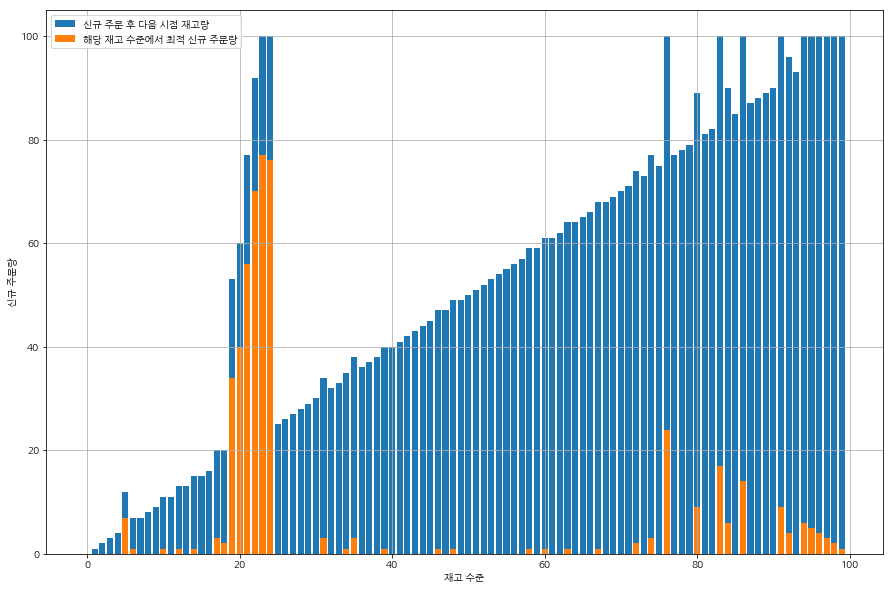

In [17]:
plt.rcParams["figure.figsize"] = (15, 10)

fig, ax = plt.subplots()
ax.bar(np.arange(100), inventory_status_list, label = '신규 주문 후 다음 시점 재고량')
ax.bar(np.arange(100), policy_list,label = '해당 재고 수준에서 최적 신규 주문량') # 신규 주문량
ax.set_xlabel('재고 수준')
ax.set_ylabel('신규 주문량')
ax.grid(True)
ax.legend()


plt.show()

# 구간별 평균

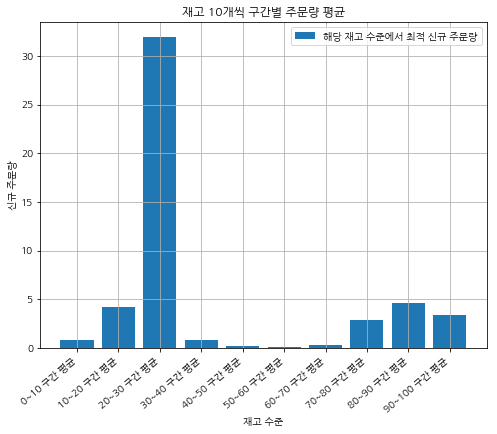

In [32]:
modified_policy01 = [np.mean(policy_list[i:i+10]) for i in range(0, 100, 10)]
range_list01 = ["{:2}~{:2} 구간 평균".format(i, i + 10) for i in range(0, 100, 10)]

plt.rcParams["figure.figsize"] = (8, 6)

fig, ax = plt.subplots()
ax.bar(range_list01, modified_policy01,label = '해당 재고 수준에서 최적 신규 주문량') # 신규 주문량
ax.set_xlabel('재고 수준')
ax.set_ylabel('신규 주문량')
ax.grid(True)
ax.legend()
ax.set_title('재고 10개씩 구간별 주문량 평균')

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')


plt.show()


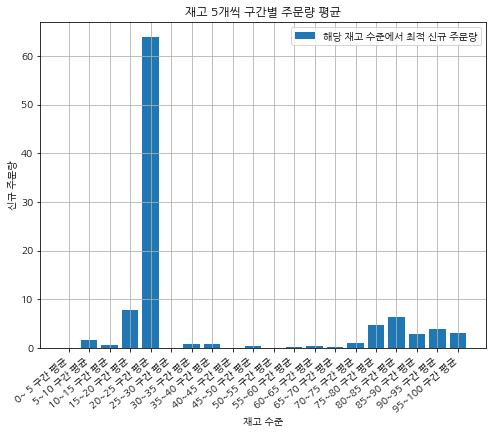

In [36]:
modified_policy02 = [np.mean(policy_list[i:i+5]) for i in range(0, 100, 5)]
range_list02 = ["{:2}~{:2} 구간 평균".format(i, i + 5) for i in range(0, 100, 5)]

plt.rcParams["figure.figsize"] = (8, 6)

fig, ax = plt.subplots()
ax.bar(range_list02, modified_policy02,label = '해당 재고 수준에서 최적 신규 주문량') # 신규 주문량
ax.set_xlabel('재고 수준')
ax.set_ylabel('신규 주문량')
ax.grid(True)
ax.legend()
ax.set_title('재고 5개씩 구간별 주문량 평균')

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')


plt.show()


# [참고] 수요량 분포

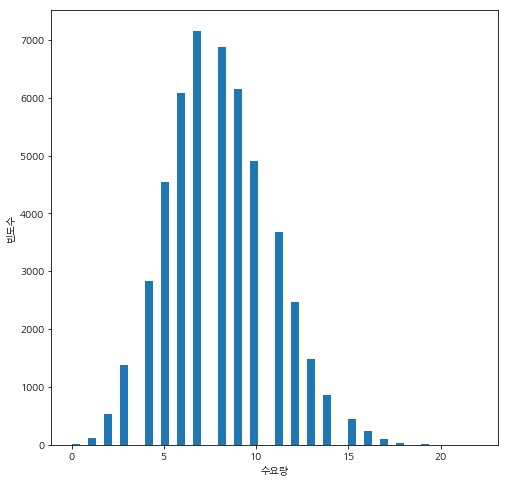

In [41]:
plt.rcParams["figure.figsize"] = (8, 8)

fig, ax = plt.subplots()
ax.hist([np.random.poisson(8) for _ in range(50000)], bins=50)
ax.set_xlabel('수요량')
ax.set_ylabel('빈도수')

plt.show()